In [5]:
import os

latest_trial_path = {}
dir_path = "./structured_data_classifier"
max_trial = 5
folders_to_check = [f"trial_{i}" if max_trial<=9 else f"trial_0{i}" for i in range(max_trial) ]
items_in_parent = os.listdir(dir_path)
# print(items_in_parent)
for folder in folders_to_check:
    if folder in items_in_parent:
        
        folder_path = os.path.join(dir_path, folder)
        mid_files =  os.listdir(folder_path)
        print(folder, mid_files)
        for mid_file in mid_files:
            if 'mid' in mid_file:
                mid_file_path = os.path.join(folder_path, mid_file)
                if folder in latest_trial_path.keys():
                    current = latest_trial_path[folder] 
                    curr_ts = current.split("mid")[-1].split(".")[0]
                    new_ts = mid_file_path.split("mid")[-1].split(".")[0]
                    if new_ts > curr_ts:
                        latest_trial_path[folder] = mid_file_path
                else:
                    latest_trial_path[folder] = mid_file_path

        

trial_0 ['checkpoint', 'checkpoint.data-00000-of-00001', 'checkpoint.index', 'pipeline', 'trial.json', 'trial_mid1692611677418.json', 'trial_mid1692611683517.json', 'trial_mid1692611683560.json']
trial_1 ['pipeline', 'trial.json', 'trial_mid1692611683705.json']


In [2]:
import sqlite3
conn = sqlite3.connect('paths.db')
cursor = conn.cursor()
conn.close()

In [1]:
import json
with open("../structured_data_classifier\\trial_4\\trial_mid1692727000456.json", 'r') as f:
    data = json.load(f)

In [2]:
data

{'trial_id': '4',
 'hyperparameters': {'space': [{'class_name': 'Boolean',
    'config': {'name': 'structured_data_block_1/normalize',
     'default': False,
     'conditions': []}},
   {'class_name': 'Boolean',
    'config': {'name': 'structured_data_block_1/dense_block_1/use_batchnorm',
     'default': False,
     'conditions': []}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/num_layers',
     'default': 2,
     'conditions': [],
     'values': [1, 2, 3],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/units_0',
     'default': 32,
     'conditions': [],
     'values': [16, 32, 64, 128, 256, 512, 1024],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name': 'structured_data_block_1/dense_block_1/dropout',
     'default': 0.0,
     'conditions': [],
     'values': [0.0, 0.25, 0.5],
     'ordered': True}},
   {'class_name': 'Choice',
    'config': {'name'

In [3]:
data = [('trial_0', '../structured_data_classifier\\trial_0\\trial_mid1692726980299.json'), ('trial_1', '../structured_data_classifier\\trial_1\\trial_mid1692726984966.json'), ('trial_2', '../structured_data_classifier\\trial_2\\trial_mid1692726989883.json'), ('trial_3', '../structured_data_classifier\\trial_3\\trial_mid1692726995403.json'), ('trial_4', '../structured_data_classifier\\trial_4\\trial_mid1692727000456.json')]

In [24]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))


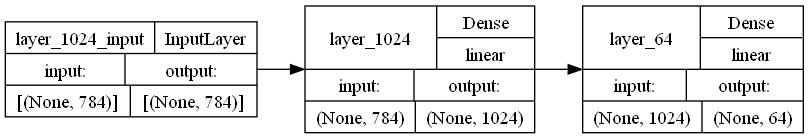

In [63]:
# Visualize the model architecture
vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='LR', expand_nested=True, show_layer_activations=True )


In [65]:
import os
os.path.dirname("../structured_data_classifier\\trial_2\\trial_mid1692807828308.json")

'../structured_data_classifier\\trial_2'

In [30]:
import tensorflow as tf
from keras.utils import plot_model
import json

In [32]:
with open("../structured_data_classifier\\trial_2\\trial_mid1692807828308.json", 'r') as f:
    json_data = f.read() 
    data = json.loads(json_data)

In [37]:
values = data['hyperparameters']['values']
values

{'structured_data_block_1/normalize': False,
 'structured_data_block_1/dense_block_1/use_batchnorm': False,
 'structured_data_block_1/dense_block_1/num_layers': 2,
 'structured_data_block_1/dense_block_1/units_0': 1024,
 'structured_data_block_1/dense_block_1/dropout': 0.0,
 'structured_data_block_1/dense_block_1/units_1': 64,
 'classification_head_1/dropout': 0.0,
 'optimizer': 'adam',
 'learning_rate': 0.001}

In [53]:
num_layers = values["structured_data_block_1/dense_block_1/num_layers"]
layer_units = []
for i in range(num_layers):
    layer_units.append(values[f"structured_data_block_1/dense_block_1/units_{i}"])

In [62]:
model = create_model(layer_units)

In [61]:
def create_model(layer_units):
    model = Sequential()
    model.add(Dense(units=layer_units[0], input_dim=784, name=f"layer_{layer_units[0]}"))
    layer_units = layer_units[1:]
    for units in layer_units:
        model.add(Dense(units=units, name=f"layer_{units}"))
    
    return model